##  Bouaichi, Odegaard Neese and Vincis - Ephys
***
  - This notebook generate the raw panels of all the figures of the manuscript "Intraoral thermal processing in the gustatory cortex of awake mice."
  - All the panels for each figures are combined/adjusted using Illustrator.
***
### Table of Contents
1) <a href='#Setting'>General_setting_notebook</a>

2) <a href='#LoadData'>Load_the_data</a>

3) <a href='#Figure1B'>Figure1B</a>

4) <a href='#Figure1F'>Figure1F</a>

5) <a href='#Figure1G'>Figure1G</a>

6) <a href='#Figure2'>Figure2</a>

7) <a href='#Figure3'>Figure3</a>

8) <a href='#Figure4'>Figure4</a>

9) <a href='#Figure5'>Figure5</a>

10) <a href='#Figure6'>Figure6</a>

In [ ]:
#!pip install jupyter_contrib_nbextensions

<a id='Setting'></a>
General_setting_notebook

In [17]:
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>")) 
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score


mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.labelsize"] = 8
mpl.rcParams["xtick.labelsize"] = 6
mpl.rcParams["ytick.labelsize"] = 6
mpl.rcParams["axes.titlesize"] = 9
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["figure.dpi"]= 300
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["xtick.minor.visible"] = True
mpl.rcParams["ytick.minor.visible"] = True

###### Make sure the data and additional code needed are in the right '\Data\' and '\Script\ folder

In [9]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from Script.Script_figures import (snippet_fig2_1,snippet_fig2_2,snippet_fig2_3,snippet_fig2_4,snippet_fig2_5,Figure_1F,Figure_1G,Figure_2,Figure_3,
                            Figure_4, Figure_5, plot_r_and_psth_Lick) # adjust the source path for the codes dowloaded from GitHub
from Script.Script  import smooth_all_spike_trains, bin_all_spike_trains
from Script.Script2 import extr_responsivness_wilcoxon_and_tuning

filePath = Path(os.getcwd()) # change this path according to where you have dowloaded the data

fileName_main = 'Data/Main_Temp.csv'
Main_Temp = pd.read_csv(filePath / fileName_main) # load the main dataframe for figures 1-5

<a id='Figure1B'></a>
#### Figure 1B
***
'I need to change this  - this figure is not the updated one '
Caption:

['ColdTS.csv', 'RTTS.csv', 'HotTS.csv']


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 19.09it/s]


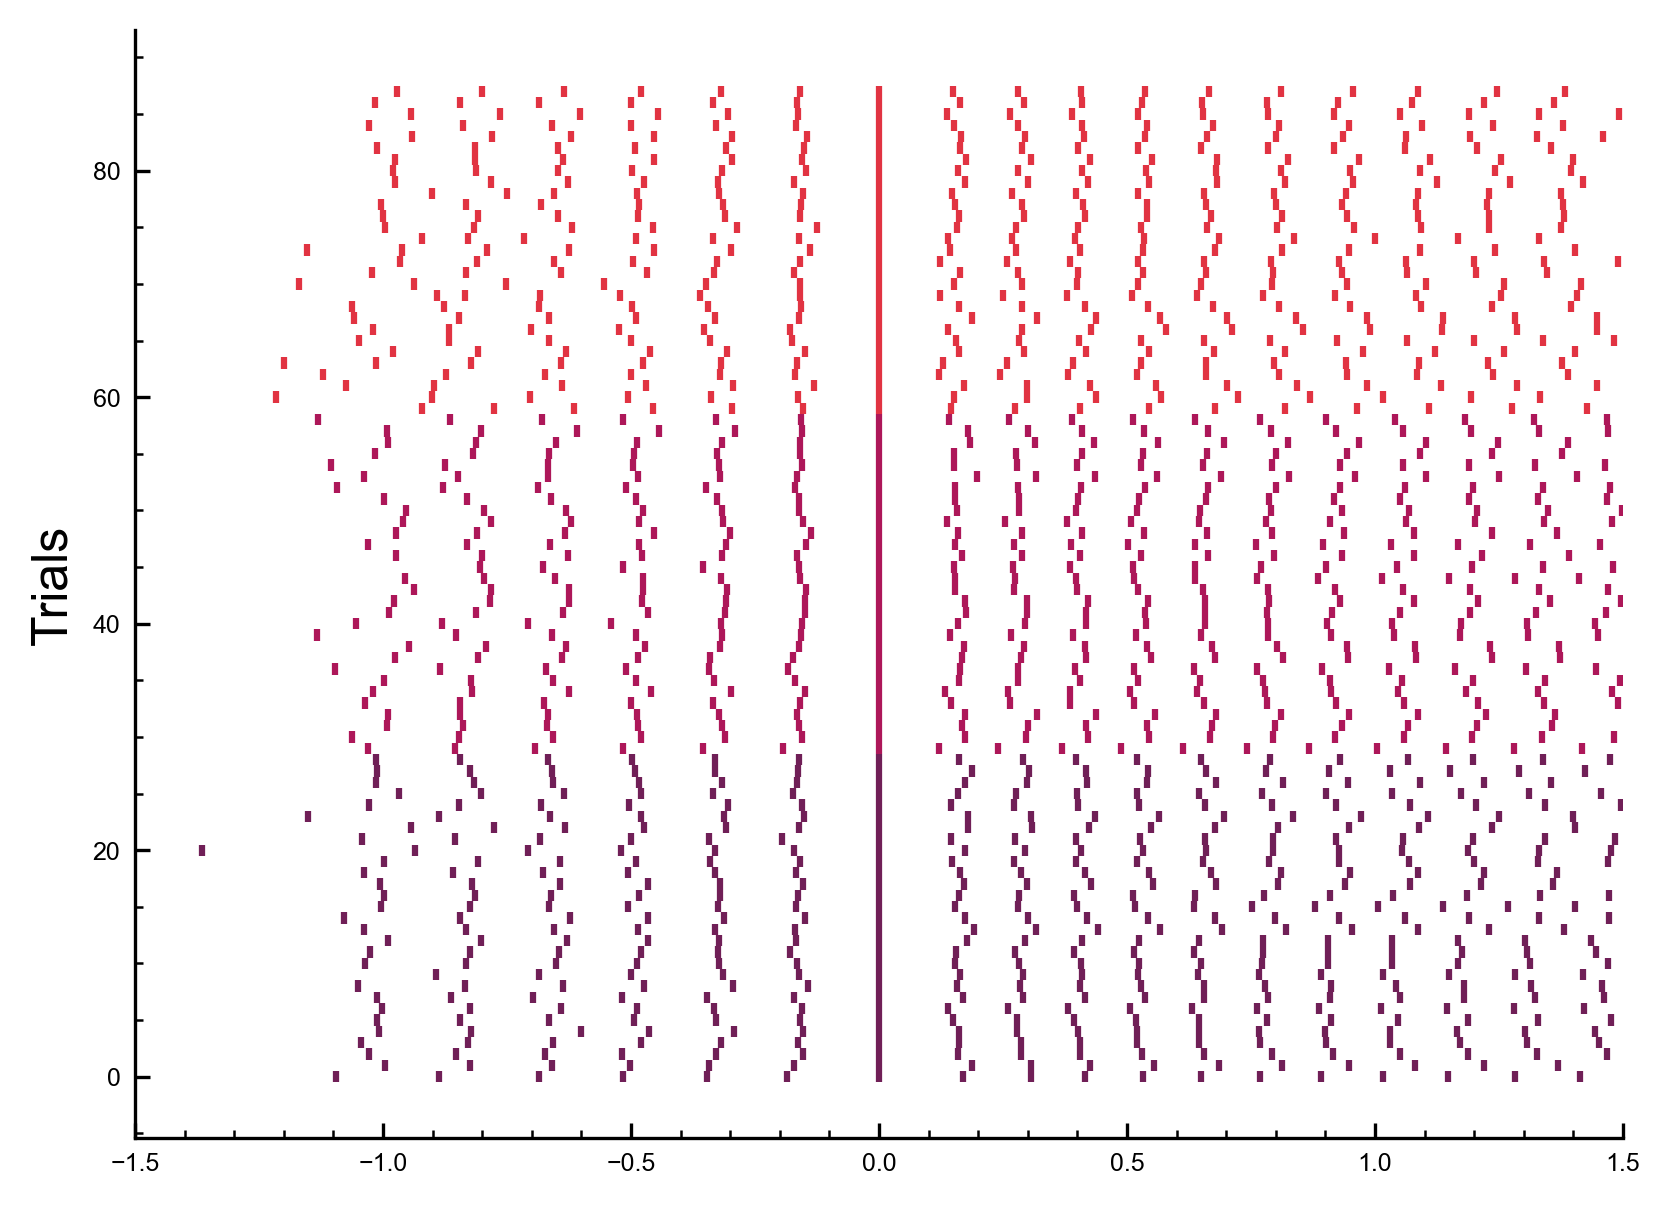

In [18]:
plot_r_and_psth_Lick(filePath/'Data/','CB303','061522',1.5,1.5)

<a id='Figure1F'></a>
#### Figure 1F
***
'I need to change this  - this figure is not the updated one '
Caption:

In [ ]:
mouse          = 'CB303'
Date           = '061622'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

one,one_one,one_two,one_three,one_four,_one_five,min_Trial = snippet_fig2_1(df_allN,df_allN_smooth,neuron=6)
two,two_one,two_two,two_three,two_four,_two_five,min_Trial_2 = snippet_fig2_1(df_allN,df_allN_smooth,neuron=10)

Figure_1F(one,one_one,one_two,one_three,one_four,_one_five,min_Trial,
          two,two_one,two_two,two_three,two_four,_two_five,min_Trial_2)

<a id='Figure1G'></a>
#### Figure 1G
***
'I need to change this  - this figure is not the updated one '
Caption:

In [ ]:
mouse          = 'CB312'
Date           = '081022'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

three,three_one,three_two,three_three,min_Trial_3 = snippet_fig2_2(df_allN,df_allN_smooth,neuron=1)

mouse          = 'CB303'
Date           = '061522'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

four,four_one,four_two,four_three,min_Trial_4 = snippet_fig2_2(df_allN,df_allN_smooth,neuron=19)

Figure_1G(three,three_one,three_two,three_three,min_Trial_3,
          four,four_one,four_two,four_three,min_Trial_4)

<a id='Figure2'></a>
#### Figure 2
***
- The color of the boxplot in D differs compared to the one in the manuscript. It was changed in Illustrator.
- Same of the points in F are masked by the inset showing the example waveform. They are visible in the manuscript version. 
- Statistic pertaining panel D is performed in R - to run it again download RStudio and load the file "Fig2D.R"

Caption:
    

In [ ]:
Main_Temp_Resp    = Main_Temp[(Main_Temp['resp_Cold_']==1) | (Main_Temp['resp_Hot_']==1) | (Main_Temp['resp_Room_']==1)]
len(Main_Temp_Resp)

In [ ]:
#Main_Temp_Resp['latCold_'].dropna().reset_index()

x = Main_Temp_Resp['latCold_'].dropna().reset_index()['latCold_']
y = Main_Temp_Resp['latRoom_'].dropna().reset_index()['latRoom_']
z = Main_Temp_Resp['latHot_'].dropna().reset_index()['latHot_']
DF_L1 = pd.DataFrame()
DF_L2 = pd.DataFrame()
DF_L3 = pd.DataFrame()

DF_L1['Lat'] = x
DF_L1['Stim'] = ['cold']*len(DF_L1)
DF_L2['Lat'] = y
DF_L2['Stim'] = ['room']*len(DF_L2)
DF_L3['Lat'] = z
DF_L3['Stim'] = ['hot']*len(DF_L3)
#DF_2['Lat'] = y
#DF_3['Lat'] = z
DF = pd.concat([DF_L1,DF_L2,DF_L3],axis=0)
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure2D.csv")

In [ ]:
import pandas as pd
import pickle

with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/active.pickle','rb') as file: 
    temp_active = pickle.load(file)   
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/supp.pickle','rb') as file: 
    temp_supp = pickle.load(file)    
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/nonresp.pickle','rb') as file: 
    temp_nonresp = pickle.load(file)

Figure_2(Main_Temp,temp_active,temp_supp,temp_nonresp)

<a id='Figure3'></a>
#### Figure 3
***
Caption:

In [ ]:
import pandas as pd
import pickle
from Script2 import extr_responsivness_wilcoxon_and_tuning

import numpy as np

mouse          = 'CB303'
Date           = '061722'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

three,three_one,three_two,three_three,min_Trial_3 = snippet_fig2_2(df_allN,df_allN_smooth,neuron=4)

mouse          = 'CB280'
Date           = '121721'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

four,four_one,four_two,four_three,min_Trial_4 = snippet_fig2_2(df_allN,df_allN_smooth,neuron=1)

Fin_2 = extr_responsivness_wilcoxon_and_tuning(filePath)

Main_Temp['T3_0'] = Fin_2[:,0]
Main_Temp['T3_1'] = Fin_2[:,1]
Main_Temp['T3_2'] = Fin_2[:,2]

Main_Temp_Resp    = Main_Temp[(Main_Temp['resp_Cold_']==1) | (Main_Temp['resp_Hot_']==1) | (Main_Temp['resp_Room_']==1)]

Resp_sel = Main_Temp_Resp[Main_Temp_Resp['flag_Temp']==True].reset_index()
Resp_unsel = Main_Temp_Resp[Main_Temp_Resp['flag_Temp']==False]

one_d =  100*(sum(Resp_sel[['resp_Cold_','resp_Room_','resp_Hot_']].T.sum()==1)/len(Resp_sel))
two_d = 100*(sum(Resp_sel[['resp_Cold_','resp_Room_','resp_Hot_']].T.sum()==2)/len(Resp_sel))
three_d = 100*(sum(Resp_sel[['resp_Cold_','resp_Room_','resp_Hot_']].T.sum()==3)/len(Resp_sel))

cold_perc = 100*(Resp_sel[['resp_Cold_','resp_Room_','resp_Hot_']].sum()[0]/len(Resp_sel))
room_perc = 100*(Resp_sel[['resp_Cold_','resp_Room_','resp_Hot_']].sum()[1]/len(Resp_sel))
hot_perc = 100*(Resp_sel[['resp_Cold_','resp_Room_','resp_Hot_']].sum()[2]/len(Resp_sel))

df_test = Resp_sel[['T3_0','T3_2','T3_1']]
df_test_1  = df_test[(df_test['T3_0']<df_test['T3_2'])&(df_test['T3_2']<df_test['T3_1'])]
df_test_11 = df_test[(df_test['T3_0']<df_test['T3_2'])&(df_test['T3_2']==df_test['T3_1'])]
df_test_111= df_test[(df_test['T3_0']==df_test['T3_2'])&(df_test['T3_2']<df_test['T3_1'])]

df_test_2  = df_test[(df_test['T3_0']>df_test['T3_2'])&(df_test['T3_2']>df_test['T3_1'])]
df_test_22 = df_test[(df_test['T3_0']>df_test['T3_2'])&(df_test['T3_2']==df_test['T3_1'])]
df_test_222= df_test[(df_test['T3_0']==df_test['T3_2'])&(df_test['T3_2']>df_test['T3_1'])]

df_test_3 = df_test[(df_test['T3_0']>df_test['T3_2'])&(df_test['T3_2']<df_test['T3_1'])]
df_test_4 = df_test[(df_test['T3_0']<df_test['T3_2'])&(df_test['T3_2']>df_test['T3_1'])]

#Figure_3(three,three_one,three_two,three_three,min_Trial_3,
#         four,four_one,four_two,four_three,min_Trial_4,
#         len(Resp_sel),len(Resp_unsel),len(Main_Temp_Resp),
#         one_d,two_d,three_d,
#         cold_perc,room_perc,hot_perc,
#         df_test_1,df_test_11,df_test_111,
#         df_test_2,df_test_22,df_test_222,
#         df_test_3,df_test_4)

<a id='Figure4'></a>
#### Figure 4
***
Caption:

In [ ]:
Figure_4(filePath / fileName4a_1,filePath / fileName4a_2)

In [ ]:
# REMOVE FROM THE PUBLIC JUPYTER NOTEBOOK IN GITHUB - it will take to long to regenerate this. We can add it back if asked
from Script import smooth_all_spike_trains,sliding_window_decoding
from Script2 import prepare_for_decoding
#update_df = df.drop('c')
#Resp_sel_final_reset_2 = Resp_sel_final_reset.drop(10)
#Resp_sel_final.drop(Resp_sel_final.iloc[10,:],inplace=True, axis=0)
#Resp_sel_final_reset_2.iloc[10,:]
# below the function ("prepare_for_decoding") to prepare the dataframes for decoding
#   y         = pandas dataframe containing the binned spikes (10ms) and correct label-trials pair
#   y_shuffle = pandas dataframe as y BUT containing the shuffled label-trials pair
y_sliding,y_shuffle_sliding = prepare_for_decoding(Resp_sel, bin_size=25)

In [ ]:
# sliding decoding over time real labels
import pandas as pd
from Script import sliding_window_decoding

#mean_SVM_df, splits_SVM_df = sliding_window_decoding(y_sliding, method= 'ensemble', ensemble_averaging=False, window_size=2, plot_confusion_matrix=False, n_trial_pairings=50, class_labels=['Cold', 'Hot', 'Room'], test_size=1/3, num_splits=20)
mean_SVM_df         = pd.read_csv(filePath / fileName4a_1)
#splits_SVM_df       = pd.read_csv('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/slidwin_decoding_split.csv')
shuffle_SVM_df         = pd.read_csv(filePath / fileName4a_2)

# for plot -
time = np.round(np.arange(0,80,1),decimals=1)
#T = splits_SVM_df['Window'].unique() 
#for f in T:
#    mean_SVM_df.loc[1,f] = splits_SVM_df[splits_SVM_df['Window']==f].iloc[:,3:].mean().quantile(0.001)-(2*splits_SVM_df.iloc[:,3:].std().std())
#    mean_SVM_df.loc[2,f] = splits_SVM_df[splits_SVM_df['Window']==f].iloc[:,3:].mean().quantile(0.999)+(2*splits_SVM_df.iloc[:,3:].std().std())

mean_SVM_df.iloc[0,3:].rolling(5).mean().plot()
mean_SVM_df.iloc[1,3:].rolling(5).mean().plot()
mean_SVM_df.iloc[2,3:].rolling(5).mean().plot()

shuffle_SVM_df.iloc[:,1:].quantile(0.0001).rolling(5).mean().plot()
shuffle_SVM_df.iloc[:,1:].quantile(0.999).rolling(5).mean().plot()

plt.vlines(x=40, ymin = 0.2, ymax=0.75)

#mean_SVM_df.to_csv(filePath / file_1)
#from Script import smooth_spike_train

#plt.plot(time,smooth_spike_train(mean_SVM_df.iloc[0,2:-1],window_len=10), color = 'w')
#a = np.array(smooth_spike_train(mean_SVM_df.iloc[1,2:-1],window_len=10),dtype=float)
#b = np.array(smooth_spike_train(mean_SVM_df.iloc[2,2:-1],window_len=10),dtype=float)

#len(mean_SVM_df.iloc[0,2:])

In [ ]:
# sliding decoding over time shuffle labels
from Script2 import sliding_decoding_Bouaichi_Neese_Vincis
mean_SVM_df_shuffle = sliding_decoding_Bouaichi_Neese_Vincis(y_sliding,y_shuffle_sliding)

In [ ]:
# decoding over number of neurons for 1s after water delivery
from Script2 import ensemble_decoding_Bouaichi_Neese_Vincis,ensemble_decoding_pre_Bouaichi_Neese_Vincis
from Script import smooth_all_spike_trains,sliding_window_decoding
#from VincisLab_Python.tuning2 import prepare_for_decoding

#y_sliding,y_shuffle_sliding = prepare_for_decoding(Resp_sel_final, bin_size=25)

y_sliding_copy = y_sliding.copy()
#evoked = ensemble_decoding_Bouaichi_Neese_Vincis(y_sliding_copy)


np.save('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/decoding_pop_evoked', np.array(evoked), allow_pickle=True, fix_imports=True)
#np.save('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/decoding_pop_baseline', np.array(pre), allow_pickle=True, fix_imports=True)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(evoked)

In [ ]:
def createList(r1, r2):
    return np.arange(r1, r2+1, 1)
temp_y = y_sliding
temp_y['Taste'] = y_shuffle_sliding.iloc[:,5]
Temporary_df_all = pd.DataFrame()
for n in temp_y['Neuron'].unique():
    Temporary_df = pd.DataFrame()
    a = temp_y[temp_y['Neuron']==n]
    one = a[a['Taste']==0]
    two = a[a['Taste']==1]
    three = a[a['Taste']==2]
    one['Trial'] = createList(0, len(one)-1)
    two['Trial'] = createList(0, len(two)-1)
    three['Trial'] = createList(0, len(three)-1)
    Temporary_df = pd.concat([one,two,three],axis=0).reset_index(drop=True)
    if n == 0:
        Temporary_df_all = Temporary_df
    else:
        Temporary_df_all = pd.concat([Temporary_df_all,Temporary_df],axis=0).reset_index(drop=True)

In [ ]:
Temporary_df_all

In [ ]:
#y_shuffle_sliding.iloc[:,1]
Temporary_df_all['Taste'] = y_shuffle_sliding.iloc[:,9]
Temporary_df_all
#evoked_shuffle = ensemble_decoding_Bouaichi_Neese_Vincis(Temporary_df_all)
np.save('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/decoding_pop_evoked_shuffle', np.array(evoked_shuffle), allow_pickle=True, fix_imports=True)
#np.save('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/decoding_pop_baseline_shuffle', np.array(baseline_shuffle), allow_pickle=True, fix_imports=True)


In [ ]:
import numpy as np
evoked = np.load('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/decoding_pop_evoked.npy', mmap_mode=None)
evoked_shuffle = np.load('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/decoding_pop_evoked_shuffle.npy', mmap_mode=None)
import matplotlib.pyplot as plt
plt.plot(evoked)
plt.plot(evoked_shuffle)

<a id='Figure5'></a>
#### Figure 5
***
 - The titles, colors and axes labels for panels B-E are adjusted in Illustrator
 
Caption:

In [ ]:
mouse          = 'CB303'
Date           = '061522'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

three,three_one,three_two,three_three,min_Trial_3 = snippet_fig2_2(df_allN,df_allN_smooth,neuron=17)


mouse          = 'CB317'
Date           = '111022'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

four,four_one,four_two,four_three,min_Trial_4 = snippet_fig2_2(df_allN,df_allN_smooth,neuron=8)

#Figure_5(three,three_one,three_two,three_three,min_Trial_3,
#         four,four_one,four_two,four_three,min_Trial_4,
#         Resp_sel, Resp_unsel, Main_Temp_Resp)

In [ ]:
len(Resp_sel[(Resp_sel['position']=='3V')|(Resp_sel['position']=='3D')])+len(Resp_unsel[(Resp_unsel['position']=='3V')|(Resp_unsel['position']=='3D')])
#len(Resp_sel[(Resp_sel['position']=='3V')|(Resp_sel['position']=='3D')])

In [ ]:
# For linear regression Figure 5C - move to Master!
Resp_sel_probes = Resp_sel[Resp_sel['probe']!='tetrodes'].reset_index()
x = 100*Resp_sel_probes['Overall SVM Score']
y = Resp_sel_probes['DV_exact']
DF = pd.DataFrame()
DF['Dec'] = x
DF['Pos'] = y
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure5C.csv")

In [ ]:
# For one way ANOVA Figure 5E - move to Master!
x_0 = Resp_sel[(Resp_sel['position']=='0V')|(Resp_sel['position']=='0D')]['position']
y_0 = Resp_sel[(Resp_sel['position']=='0V')|(Resp_sel['position']=='0D')]['Overall SVM Score']

DF_0 = pd.DataFrame()
DF_0['Dec'] = y_0
DF_0['Pos'] = x_0

x_1 = Resp_sel[(Resp_sel['position']=='1V')|(Resp_sel['position']=='1D')]['position']
y_1 = Resp_sel[(Resp_sel['position']=='1V')|(Resp_sel['position']=='1D')]['Overall SVM Score']

DF_1 = pd.DataFrame()
DF_1['Dec'] = y_1
DF_1['Pos'] = x_1

x_2 = Resp_sel[(Resp_sel['position']=='2V')|(Resp_sel['position']=='2D')]['position']
y_2 = Resp_sel[(Resp_sel['position']=='2V')|(Resp_sel['position']=='2D')]['Overall SVM Score']

DF_2 = pd.DataFrame()
DF_2['Dec'] = y_2
DF_2['Pos'] = x_2

x_3 = Resp_sel[(Resp_sel['position']=='3V')|(Resp_sel['position']=='3D')]['position']
y_3 = Resp_sel[(Resp_sel['position']=='3V')|(Resp_sel['position']=='3D')]['Overall SVM Score']

DF_3 = pd.DataFrame()
DF_3['Dec'] = y_3
DF_3['Pos'] = x_3

DF = pd.concat((DF_0,DF_1,DF_2,DF_3),axis=0,ignore_index=True)
DF

DF['Position']=['NaN']*len(DF)
for i in range(len(DF)):
    if DF.iloc[i,1][0] == '0':
        DF.iloc[i,2] = 'zero'
    elif DF.iloc[i,1][0] == '1':
        DF.iloc[i,2] = 'one'
    elif DF.iloc[i,1][0] == '2':
        DF.iloc[i,2] = 'two'
    elif DF.iloc[i,1][0] == '3':
        DF.iloc[i,2] = 'three'
        
DF = DF.drop(['Pos'],axis=1)
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure5E.csv")

In [ ]:
len(Resp_sel)

<a id='Figure6'></a>
#### Figure 6
*** 
Caption:

In [ ]:
fileName_main = 'Main_Water_Saliva.csv'
MWS = pd.read_csv(filePath / fileName_main) #

In [ ]:
MWS['mouse'].unique()

In [ ]:
MWS[MWS['mouse']=='CB346']

In [ ]:
# plotting the psths
from Script_figures import (snippet_fig2_3, snippet_fig2_4,snippet_fig2_5,Figure_6)
from Script import smooth_all_spike_trains

import numpy as np

mouse          = 'CB347'
Date           = '032123'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

nine,nine_one,nine_two,nine_three, nine_four,min_Trial_9 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=5,class_labels = ['Water14','Water36','Saliva14','Saliva36'])

mouse          = 'CB345'
Date           = '032123'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

ten,ten_one,ten_two,ten_three,ten_four,min_Trial_10 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=8,class_labels = ['Water14','Water36','Saliva14','Saliva36'])

#mouse          = 'CB347'
#Date           = '032123'
#fileName       = 'SU_Analysis/allN.pickle'

#df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
#df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

#ten,ten_one,ten_two,ten_three,ten_four,min_Trial_10 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=16,class_labels = ['Water14','Water36','Saliva14','Saliva36'])

import pickle
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Cold_Water.pickle','rb') as file: 
    CW = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Cold_Saliva.pickle','rb') as file: 
    CS = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Hot_Water.pickle','rb') as file: 
    HW = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Hot_Saliva.pickle','rb') as file: 
    HS = pickle.load(file) 
    
CW= np.array(CW)
CS = np.array(CS)
HW = np.array(HW)
HS = np.array(HS)    

Figure_6(nine,nine_one,nine_two,nine_three, nine_four,min_Trial_9,
         ten,ten_one,ten_two,ten_three,ten_four,min_Trial_10,
         MWS,
         CW,CS,HW,HS)

In [ ]:
# For linear regression Figure 6D - move to Master!
x = 100*CS[:,6:11].mean(axis=1)
y = 100*CW[:,6:11].mean(axis=1)
DF = pd.DataFrame()
DF['CS'] = x
DF['CW'] = y
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure6D_cold.csv")

x = 100*HS[:,6:11].mean(axis=1)
y = 100*HW[:,6:11].mean(axis=1)
DF = pd.DataFrame()
DF['HS'] = x
DF['HW'] = y
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure6D_hot.csv")

<a id='Figure7'></a>
#### Figure 7
*** 
Caption:

In [ ]:
fileName_main = 'Main_Tasteroom_and_temp.csv'
MTT = pd.read_csv(filePath / fileName_main) #

In [ ]:
Taste_and_temp = len(MTT[(MTT['flag_Taste']==True) & (MTT['flag_Temp']==True)])
Taste_only = len(MTT[MTT['flag_Taste']==True]) - Taste_and_temp
Taste_only

In [ ]:
MTT[MTT['mouse']=='KO035']

In [ ]:
#x_1 = Resp_sel[(Resp_sel['position']=='1V')|(Resp_sel['position']=='1D')]['position']
len(MTT[(MTT['flag_Taste'].isnull()) & (MTT['flag_Temp'].isnull())])
len(MTT[MTT['flag_Taste']==True])
len(MTT[(MTT['flag_Taste']==True) & (MTT['flag_Temp']==True)])
len(MTT[(MTT['flag_Taste']==True) & (MTT['flag_Temp']==False)])

In [ ]:
len(MTT[MTT['flag_Taste']==True])-len(MTT[(MTT['flag_Taste']==True) & (MTT['flag_Temp']==True)])


In [ ]:
from Script_figures import Figure_7

import numpy as np

####################################################################################################################
mouse          = 'CB347'
Date           = '031723'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

seven,seven_one,seven_two,seven_three,seven_four,min_Trial_7 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=7)
eight,eight_one,eight_two,min_Trial_8 = snippet_fig2_4(df_allN,df_allN_smooth,neuron=7)

####################################################################################################################
mouse          = 'CB348'
Date           = '031923'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

nine,nine_one,nine_two,nine_three,nine_four,min_Trial_9 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=6)
ten,ten_one,ten_two,min_Trial_10 = snippet_fig2_4(df_allN,df_allN_smooth,neuron=6)

####################################################################################################################
mouse          = 'CB347'
Date           = '031923'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

eleven,eleven_one,eleven_two,eleven_three,eleven_four,min_Trial_11 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=4)
twelve,twelve_one,twelve_two,min_Trial_12 = snippet_fig2_4(df_allN,df_allN_smooth,neuron=4)

####################################################################################################################
mouse          = 'CB347'
Date           = '031723'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

thirteen,thirteen_one,thirteen_two,thirteen_three,thirteen_four,min_Trial_13 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=3)
fourteen,fourteen_one,fourteen_two,min_Trial_14 = snippet_fig2_4(df_allN,df_allN_smooth,neuron=3)

####################################################################################################################
Figure_7(seven,seven_one,seven_two,seven_three,seven_four,min_Trial_7,
            eight,eight_one,eight_two,min_Trial_8,
            nine,nine_one,nine_two,nine_three,nine_four,min_Trial_9,
            ten,ten_one,ten_two,min_Trial_10,
            eleven,eleven_one,eleven_two,eleven_three,eleven_four,min_Trial_11,
            twelve,twelve_one,twelve_two,min_Trial_12,
            thirteen,thirteen_one,thirteen_two,thirteen_three,thirteen_four,min_Trial_13,
            fourteen,fourteen_one,fourteen_two,min_Trial_14,
            MTT)

<a id='Figure8'></a>
#### Figure 8
*** 
Caption:

In [ ]:
fileName_main = 'Main_Tasteroom_and_temp.csv'
MTT = pd.read_csv(filePath / fileName_main) #
df_t = MTT[MTT['flag_Taste']==True]

x = df_t[df_t['flag_Temp']==True]['SI'].dropna()
x_1 = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())]['SI'].dropna()
len(x[(x>0)&(x<0.35)])
len(x)
len(x_1[(x_1>0)&(x_1<0.35)])
len(x_1)

x = df_t[df_t['flag_Temp']==True]['SI'].dropna()
x_1 = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())]['SI'].dropna()
len(x[(x>0.65)&(x<1)])
len(x)
len(x_1[(x_1>0.65)&(x_1<1)])
len(x_1)

x = df_t[df_t['flag_Temp']==True]['SVM_Taste'].dropna()
x_1 = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())]['SVM_Taste'].dropna()
len(x[(x>0.55)&(x<1)])
len(x)
len(x_1[(x_1>0.55)&(x_1<1)])
#len(x_1)

In [ ]:
from Script_figures import Figure_8
Figure_8(MTT)

df_t = MTT[MTT['flag_Taste']==True]

x = df_t[df_t['flag_Temp']==True]['SI'].dropna().reset_index()
y = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())]['SI'].dropna().reset_index()
DF = pd.DataFrame()
DF['TT'] = x['SI']
DF['OT'] = y['SI']
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure8B.csv")
##
x = df_t[df_t['flag_Temp']==True]['PI'].dropna().reset_index()
y = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())]['PI'].dropna().reset_index()
DF = pd.DataFrame()
DF['TT'] = x['PI']
DF['OT'] = y['PI']
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure8C.csv")
##
x = df_t[df_t['flag_Temp']==True]['SVM_Taste'].dropna().reset_index()
y = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())]['SVM_Taste'].dropna().reset_index()
DF = pd.DataFrame()
DF['TT'] = x['SVM_Taste']
DF['OT'] = y['SVM_Taste']
DF.to_csv("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Plos Biology/data_Figure8D.csv")

In [ ]:
df_t[df_t['flag_Temp']==True][['latCitricAcid','latNaCl','latQuinine','latSucrose']].plot()
#df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())][['latCitricAcid','latNaCl','latQuinine','latSucrose']].mean()

In [ ]:
df_t = MTT[MTT['flag_Taste']==True]
A = df_t[df_t['flag_Temp']==True][['resp_CitricAcid','resp_NaCl','resp_Quinine','resp_Sucrose']].sum()/len(df_t[df_t['flag_Temp']==True])
B = df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())][['resp_CitricAcid','resp_NaCl','resp_Quinine','resp_Sucrose']].sum()/len(df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())])
plt.plot(df_t[df_t['flag_Temp']==True][['resp_CitricAcid','resp_NaCl','resp_Quinine','resp_Sucrose']].mean())
plt.plot(df_t[(df_t['flag_Temp']==False)|(df_t['flag_Temp'].isnull())][['resp_CitricAcid','resp_NaCl','resp_Quinine','resp_Sucrose']].mean())
plt.ylim(0,1)

### After revision...from here
##### Things to do for the paper/AChemS:
***
1 . Remove current figure 1; it does not add much and it has created some issues with Reviewers
2 . Add a figure/analysis on overlap of taste and thermal responses at single neuron level
   - If you take the ones that respond to both taste and temperature of water, use them to evaluate if taste response encode palatability - a way to investigate if ...
       - How to go about it....
           - loop trough each neuron
           - load the pickle file, split it into two
              - one contaning only taste labels
              - one containing only temp labels
           - run taste (at room temp) responsivness (baseline vs. evoked) for each taste, and if responsive to at least one - run the two way anova for taste specificity
           - run thermal responsivness (baseline vs. evoked) for each temperature, and if responsive to at least one - run the two way anova for thermal specificity
           - Keep track of identity of taste and thermal responsivness
           - For the taste and thermal responsive neurons, compute the palatability index
3 . Add a figure/analysis on similarities of water and artificial saliva activity
***     

###### - Add a figure/analysis on overlap of taste and thermal responses at single neuron level
 - add python library to access external servers

In [ ]:
from VincisLab_Python.Google_spreadsheet_loading import load_spreadsheet
df = load_spreadsheet("1VWYtFLisr21vRaqPDGNZYLLXJ3zcMDYwQCOj_j6XQrY","All_summary_analyzed_temp_and_taste.xls","All Session")

In [ ]:
df[df['Protocol']=='taste_room_and_temp']

In [ ]:
%%capture
from pathlib import Path
filePath = Path('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis') 
from VincisLab_Python.Google_spreadsheet_loading import analysis_responsivness_df_tasteroom_temp
analysis_responsivness_df_tasteroom_temp(df,'taste_room_and_temp',filePath)

In [ ]:
# load the .csv ----
# 1 - Extract the ratio of taste responsive neurons that are also thermal responsive 
# 2 - Extract the ratio of  thermal responsive  neurons that are also taste responsive
# 3 - Extract the Sharpness Index of taste AND thermal responsive vs. taste responsive only - Are taste and thermal responsive neurons displaying a different tuning properties?
import pandas as pd
fileName_main = 'Main_Tasteroom_and_temp.csv'
MTT = pd.read_csv(filePath / fileName_main) # load the main dataframe


In [ ]:
MTT

In [ ]:
len(MTT[((MTT['AnovaTasteRoom']==0) | (MTT['AnovaTasteRoom'].isnull())) & ((MTT['AnovaTemp'].isnull()) | (MTT['AnovaTemp']==0))])
len(MTT[MTT['AnovaTasteRoom']==1])


In [ ]:
import matplotlib.pyplot as plt
# ratio of taste responsive neurons and thermal -temperature dependent neurons
A = len(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp'].isnull())])
B = len(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==0)])

C = len(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)])

print((A+B)/len(MTT[MTT['AnovaTasteRoom']==1]))
print(C/len(MTT[MTT['AnovaTasteRoom']==1]))
state = ('Taste selective only','Taste selective and temp. dependent')
fig, ax = plt.subplots()
sizes = [(A+B),C]
explode = (0,0.05)
ax.pie(sizes, explode,autopct='%1.1f%%')
ax.legend(state, loc="center")

# ratio of taste responsive neurons and thermal -temperature dependent neurons
#At = len(MTT[(MTT['AnovaTemp']==1) & (MTT['AnovaTasteRoom'].isnull())])
#Bt = len(MTT[(MTT['AnovaTemp']==1) & (MTT['AnovaTasteRoom']==0)])

#Ct = len(MTT[(MTT['AnovaTemp']==1) & (MTT['AnovaTasteRoom']==1)])
#state = ('Temp. dependent only','Temp. dependent and taste')
#fig1, ax1 = plt.subplots()
#sizes = [(At+Bt),Ct]
#explode = (0,0.05)
#ax1.pie(sizes, explode)
#ax1.legend(state, loc="center")
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_8_e.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
# tuning curve of the taste responsive neuron 
plt.plot(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)][['resp_CitricAcid','resp_NaCl','resp_Quinine','resp_Sucrose']].mean())
plt.plot(MTT[((MTT['AnovaTemp'].isnull()) | (MTT['AnovaTemp']==0)) & (MTT['AnovaTasteRoom']==1)][['resp_CitricAcid','resp_NaCl','resp_Quinine','resp_Sucrose']].mean())
plt.ylim(0,1)
#plt.ylim(0,1.2)
#plt.plot(MTT[((MTT['AnovaTasteRoom'].isnull()) | (MTT['AnovaTasteRoom']==0)) & (MTT['AnovaTemp']==1)][['resp_Cold','resp_Hot']].mean())
#plt.plot(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)][['resp_Cold','resp_Hot']].mean())
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_8_f.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)]

In [ ]:
d2
np.full(
  shape=len(d2),
  fill_value=1,
  dtype=np.int
)
 

In [ ]:
import matplotlib.pyplot as plt

red_square = dict(markerfacecolor='r', marker='s')
import numpy as np
d2 = np.concatenate((np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==0)]['SI']), np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp'].isnull())]['SI'])))
data = [np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)]['SI']), d2]
fig, ax = plt.subplots()
ax.boxplot(data,vert=False)
ax.plot(d2,np.full(
  shape=len(d2),
  fill_value=2,
  dtype=np.int
),marker='o', linestyle = 'None')
ax.plot(np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)]['SI']),np.full(
  shape=len(np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)]['SI'])),
  fill_value=1,
  dtype=np.int
),marker='o', linestyle = 'None')
d2.mean() 
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_8_d.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
import numpy as np
[np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==1)]['SI']), np.array(MTT[(MTT['AnovaTasteRoom']==1) & (MTT['AnovaTemp']==0)]['SI'])]

###### examples of taste (room temp) responsive BUT temperature independent
CB347 031923 SU22
CB347 031723 SU19
CB348 031923 SU51

###### examples of taste (room temp) responsive AND temperature independent
CB348 031923 SU48
CB347 031723 SU46

##### Things to do for the paper/AChemS part II:
***
1 . Water vs. Artificial Saliva

*** 

In [ ]:
# Things to leave only in the master versio of the juoyter notebook
from VincisLab_Python.Google_spreadsheet_loading import load_spreadsheet
df = load_spreadsheet("1VWYtFLisr21vRaqPDGNZYLLXJ3zcMDYwQCOj_j6XQrY","All_summary_analyzed_temp_and_taste.xls","All Session")
%%capture
from pathlib import Path
filePath = Path('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis') 
from VincisLab_Python.Google_spreadsheet_loading import analysis_responsivness_df_water_saliva
#analysis_responsivness_df_water_saliva(df,'water_saliva',filePath)
# lets plot the decoding performance of  
import pandas as pd
import matplotlib.pyplot as plt
fileName_main = 'Main_Water_Saliva.csv'
MWS = pd.read_csv(filePath / fileName_main) #
plt.plot(MWS[MWS['flag']==1][['Overall SVM Score','Overall SVM Score.1']].T)
len(MWS)

In [ ]:
%%capture
from pathlib import Path
filePath = Path('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis') 
from VincisLab_Python.Google_spreadsheet_loading import analysis_responsivness_df_water_saliva
#analysis_responsivness_df_water_saliva(df,'water_saliva',filePath)

In [ ]:
#plt.scatter(MWS[MWS['flag']==1]['Overall SVM Score'].T,MWS[MWS['flag']==1]['Overall SVM Score.1'].T)
#plt.plot([0.4, 1], [0.4, 1], ls="--", c=".3", alpha = 0.2)

x = 100*MWS[MWS['flag']==1]['Overall SVM Score'].T
y = 100*MWS[MWS['flag']==1]['Overall SVM Score.1'].T
model = np.polyfit(x, y, 1)
plt.plot(x,y,'o')
predict = np.poly1d(model)
x_lin_reg = range(50, 100)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
r2_Sc = r2_score(y, predict(x))

figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_saliva_reg.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
y

In [ ]:
len(MWS[MWS['flag']==1][['Overall SVM Score','Overall SVM Score.1']])

###### examples for single units:
CB345_032123_SU33
CB345_032123_SU11
CB347_032123_SU26
CB347_032123_SU70

In [ ]:
# plotting the psths
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import Bouaichi_Neese_Vincis_Figure_7
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import snippet_fig2_3, snippet_fig2_4,snippet_fig2_5
from VincisLab_Python.EnsembleDecoding.decoding_tools import smooth_all_spike_trains

import numpy as np

mouse          = 'CB347'
Date           = '032123'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

nine,nine_one,nine_two,nine_three, nine_four,min_Trial_9 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=5,class_labels = ['Water14','Water36','Saliva14','Saliva36'])

mouse          = 'CB345'
Date           = '032123'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

ten,ten_one,ten_two,ten_three,ten_four,min_Trial_10 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=8,class_labels = ['Water14','Water36','Saliva14','Saliva36'])

mouse          = 'CB347'
Date           = '032123'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)

eleven,eleven_one,eleven_two,eleven_three,eleven_four,min_Trial_11 = snippet_fig2_3(df_allN,df_allN_smooth,neuron=16,class_labels = ['Water14','Water36','Saliva14','Saliva36'])

import pickle
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Cold_Water.pickle','rb') as file: 
    CW = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Cold_Saliva.pickle','rb') as file: 
    CS = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Hot_Water.pickle','rb') as file: 
    HW = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Hot_Saliva.pickle','rb') as file: 
    HS = pickle.load(file) 
    
CW= np.array(CW)
CS = np.array(CS)
HW = np.array(HW)
HS = np.array(HS)    

Bouaichi_Neese_Vincis_Figure_7(nine,nine_one,nine_two,nine_three, nine_four,min_Trial_9,
                               ten,ten_one,ten_two,ten_three,ten_four,min_Trial_10,
                               eleven,eleven_one,eleven_two,eleven_three,eleven_four,min_Trial_11,
                               MWS,
                               CW,CS,HW,HS)

In [ ]:
import pickle
import matplotlib.pyplot as plt
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Cold_Water.pickle','rb') as file: 
    CW = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Cold_Saliva.pickle','rb') as file: 
    CS = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Hot_Water.pickle','rb') as file: 
    HW = pickle.load(file) 
with open('/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Data_for_analysis/Hot_Saliva.pickle','rb') as file: 
    HS = pickle.load(file) 
    
#plt.plot(abs(CW[[0],:].mean(axis=0)))
#plt.plot(abs(CS[[0],:].mean(axis=0)))
#plt.plot(abs(HW[[0],:].mean(axis=0)))
#plt.plot(abs(HS[[0],:].mean(axis=0)))
#plt.plot(DHSW.mean(axis=0))

In [ ]:
np.where(HW[:,5:].mean(axis=1)<0.5)

In [ ]:
import numpy as np
CW= np.array(CW)
CS = np.array(CS)
HW = np.array(HW)
HS = np.array(HS)

time = np.round(np.arange(-0.5,2,0.25),decimals=2)

#plt.plot(time,CW[np.where(HW[:,5:].mean(axis=1)<0.5)].mean(axis=0))
#plt.plot(time,CS[np.where(HW[:,5:].mean(axis=1)<0.5)].mean(axis=0))
#plt.plot(time,CS[np.where(HW[:,5:].mean(axis=1)<0.5)].std(axis=0)/np.sqrt(len(CS)))

plt.fill_between(time, CW[np.where(CW[:,5:].mean(axis=1)<0.5)].mean(axis=0), CW[np.where(CW[:,5:].mean(axis=1)<0.5)].mean(axis=0)+CW[np.where(CW[:,5:].mean(axis=1)<0.5)].std(axis=0)/np.sqrt(len(CW)), color = 'b',alpha=0.2)
plt.fill_between(time, CW[np.where(CW[:,5:].mean(axis=1)<0.5)].mean(axis=0), CW[np.where(CW[:,5:].mean(axis=1)<0.5)].mean(axis=0)-CW[np.where(CW[:,5:].mean(axis=1)<0.5)].std(axis=0)/np.sqrt(len(CW)),color = 'b',alpha=0.2)
plt.plot(time, CW[np.where(CW[:,5:].mean(axis=1)<0.5)].mean(axis=0), color= 'w')

plt.fill_between(time, CS[np.where(CS[:,5:].mean(axis=1)<0.5)].mean(axis=0), CS[np.where(CS[:,5:].mean(axis=1)<0.5)].mean(axis=0)+CS[np.where(CS[:,5:].mean(axis=1)<0.5)].std(axis=0)/np.sqrt(len(CS)), color = 'r',alpha=0.2)
plt.fill_between(time, CS[np.where(CS[:,5:].mean(axis=1)<0.5)].mean(axis=0), CS[np.where(CS[:,5:].mean(axis=1)<0.5)].mean(axis=0)-CS[np.where(CS[:,5:].mean(axis=1)<0.5)].std(axis=0)/np.sqrt(len(CS)),color = 'r',alpha=0.2)
plt.plot(time, CS[np.where(CS[:,5:].mean(axis=1)<0.5)].mean(axis=0), color= 'w')

plt.fill_between(time, CW[np.where(CW[:,5:].mean(axis=1)>0.5)].mean(axis=0), CW[np.where(CW[:,5:].mean(axis=1)>0.5)].mean(axis=0)+CW[np.where(CW[:,5:].mean(axis=1)>0.5)].std(axis=0)/np.sqrt(len(CW)), color = 'b',alpha=0.2)
plt.fill_between(time, CW[np.where(CW[:,5:].mean(axis=1)>0.5)].mean(axis=0), CW[np.where(CW[:,5:].mean(axis=1)>0.5)].mean(axis=0)-CW[np.where(CW[:,5:].mean(axis=1)>0.5)].std(axis=0)/np.sqrt(len(CW)),color = 'b',alpha=0.2)
plt.plot(time, CW[np.where(CW[:,5:].mean(axis=1)>0.5)].mean(axis=0), color= 'w')

plt.fill_between(time, CS[np.where(CS[:,5:].mean(axis=1)>0.5)].mean(axis=0), CS[np.where(CS[:,5:].mean(axis=1)>0.5)].mean(axis=0)+CS[np.where(CS[:,5:].mean(axis=1)>0.5)].std(axis=0)/np.sqrt(len(CS)), color = 'r',alpha=0.2)
plt.fill_between(time, CS[np.where(CS[:,5:].mean(axis=1)>0.5)].mean(axis=0), CS[np.where(CS[:,5:].mean(axis=1)>0.5)].mean(axis=0)-CS[np.where(CS[:,5:].mean(axis=1)>0.5)].std(axis=0)/np.sqrt(len(CS)),color = 'r',alpha=0.2)
plt.plot(time, CS[np.where(CS[:,5:].mean(axis=1)>0.5)].mean(axis=0), color= 'w')

#plt.plot(CW[np.where(HW[:,5:].mean(axis=1)>0.5)].mean(axis=0))
#plt.plot(CS[np.where(HW[:,5:].mean(axis=1)>0.5)].mean(axis=0))
#plt.plot(CS.mean(axis=0))
#plt.plot(HW.mean(axis=0))
#plt.plot(HS.mean(axis=0))
CS.shape

### Temperature and NaCl concentration

In [ ]:
from VincisLab_Python.Google_spreadsheet_loading import load_spreadsheet
df = load_spreadsheet("1VWYtFLisr21vRaqPDGNZYLLXJ3zcMDYwQCOj_j6XQrY","All_summary_analyzed_temp_and_taste.xls","All Session")

In [ ]:
df[df['Protocol']=='nacl_conc_temp']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fileName_main = 'Main_nacl_conc_temp.csv'
MNC = pd.read_csv(filePath / fileName_main) #

In [ ]:
MNC['mouse'].unique()

In [ ]:
import matplotlib.pyplot as plt
only_svm = MNC[(MNC['flag_cold']==True) | (MNC['flag_hot']==True)][['Overall SVM Score','Overall SVM Score.1']]
#plt.scatter(x = only_svm['Overall SVM Score'],y = only_svm['Overall SVM Score.1'])
#plt.plot([0.2, 0.6], [0.2, 0.6], ls="--", c=".3")
len(only_svm)

In [ ]:
0.2 + cut_off

In [ ]:
import numpy as np
cut_off = abs(only_svm['Overall SVM Score']-only_svm['Overall SVM Score.1']).mean() + (abs(only_svm['Overall SVM Score']-only_svm['Overall SVM Score.1']).std())/np.sqrt(len(only_svm))
only_svm_cutoff = only_svm[abs(only_svm['Overall SVM Score']-only_svm['Overall SVM Score.1'])>cut_off]

plt.scatter(x = only_svm['Overall SVM Score'],y = only_svm['Overall SVM Score.1'], color = 'gray')
plt.scatter(x = only_svm_cutoff['Overall SVM Score'],y = only_svm_cutoff['Overall SVM Score.1'],color = 'black')

plt.plot([0.2, 0.6], [0.2, 0.6], ls="--", c=".3", alpha = 0.2)
plt.plot([0.1, 0.6], [0.2, 0.2], ls="--", c=".3", alpha = 0.2)
plt.plot([0.2, 0.2], [0.1, 0.6], ls="--", c=".3", alpha = 0.2)
plt.plot([0.26, 0.66], [0.2, 0.6], ls="--", c="r", alpha = 0.2)
plt.plot([0.2, 0.6], [0.26, 0.66], ls="--", c="r", alpha = 0.2)

figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_9_a.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
only_svm_cutoff_2 = MNC[abs(MNC['Overall SVM Score']-MNC['Overall SVM Score.1'])>cut_off].reset_index()
only_svm_cutoff_2 = only_svm_cutoff_2[(only_svm_cutoff_2['flag_cold']==True) & (only_svm_cutoff_2['fr_norm_cold']!='0')].reset_index()

In [ ]:


only_svm_C = MNC[(MNC['flag_cold']==True) & (MNC['fr_norm_cold']!='0')].reset_index()
only_svm_H = MNC[(MNC['flag_hot']==True)& (MNC['fr_norm_cold']!='0')].reset_index()

#only_svm['fr_norm_cold'].to_numpy()
fr_cold = []
fr_hot = []
fr_cold2 = []
fr_hot2 = []

for n in range(len(only_svm_C)):
    dec_perf = list(np.array(list(map(float,only_svm_C.loc[n,'fr_norm_cold'].replace('[','').replace(']','').replace(',','').split()))))
    fr_cold.append(dec_perf)
    dec_perf_2 = list(np.array(list(map(float,only_svm_C.loc[n,'fr_cold'].replace('[','').replace(']','').replace(',','').split()))))
    fr_cold2.append(dec_perf_2)
    
    dec_perf_h = list(np.array(list(map(float,only_svm_H.loc[n,'fr_norm_hot'].replace('[','').replace(']','').replace(',','').split()))))
    fr_hot.append(dec_perf_h)
    dec_perf_2_h = list(np.array(list(map(float,only_svm_H.loc[n,'fr_hot'].replace('[','').replace(']','').replace(',','').split()))))
    fr_hot2.append(dec_perf_2_h)


In [ ]:
# making pandas dataframe with all the info about firing rate over concentrations for the NaCl responsive neurons
df_cold_norm = pd.DataFrame(np.array(fr_cold), columns = ['0.02C','0.04C','0.07C','0.15C','0.3C'])
df_hot_norm = pd.DataFrame(np.array(fr_hot), columns = ['0.02C','0.04C','0.07C','0.15C','0.3C'])
df_cold = pd.DataFrame(np.array(fr_cold2), columns = ['0.02C','0.04C','0.07C','0.15C','0.3C'])
df_hot = pd.DataFrame(np.array(fr_hot2), columns = ['0.02C','0.04C','0.07C','0.15C','0.3C'])

In [ ]:
import seaborn as sns
colours = sns.color_palette('GnBu')
colours_1 = sns.color_palette('OrRd')
df_s_cold_norm = df_cold_norm
df_s_hot_norm = df_hot_norm 
first = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.02C']

second = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.04C']

third = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.07C']

fourth = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.15C']

fifth = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.3C']

plt.plot([0]*len(first),first,marker='o',linestyle = 'None',markersize=10, color = colours[1])
plt.plot([1]*len(second),second,marker='o',linestyle = 'None',markersize=10, color = colours[2])
plt.plot([2]*len(third),third,marker='o',linestyle = 'None',markersize=10, color = colours[3])
plt.plot([3]*len(fourth),fourth,marker='o',linestyle = 'None',markersize=10, color = colours[4])
plt.plot([4]*len(fifth),fifth,marker='o',linestyle = 'None',markersize=10, color = colours[5])

plt.plot(df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])].T, color= 'b', alpha=0.2)

first_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] < df_s_hot_norm['0.3C'])]['0.02C']

second_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] < df_s_hot_norm['0.3C'])]['0.04C']

third_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] < df_s_hot_norm['0.3C'])]['0.07C']
fourth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] < df_s_hot_norm['0.3C'])]['0.15C']
fifth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] < df_s_hot_norm['0.3C'])]['0.3C']

plt.plot([0.1]*len(first_h),first_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[1])
plt.plot([1.1]*len(second_h),second_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[2])
plt.plot([2.1]*len(third_h),third_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[3])
plt.plot([3.1]*len(fourth_h),fourth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[4])
plt.plot([4.1]*len(fifth_h),fifth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[5])


plt.plot(df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] < df_s_hot_norm['0.3C'])].T, color= 'r', alpha=0.2)
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_9_a1.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
import seaborn as sns
colours = sns.color_palette('GnBu')
colours_1 = sns.color_palette('OrRd')
df_s_cold_norm = df_cold_norm
df_s_hot_norm = df_hot_norm 
first = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.15C'] > df_s_cold_norm['0.3C'])]['0.02C']

second = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.15C'] > df_s_cold_norm['0.3C'])]['0.04C']

third = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.15C'] > df_s_cold_norm['0.3C'])]['0.07C']

fourth = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.15C'] > df_s_cold_norm['0.3C'])]['0.15C']

fifth = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.15C'] > df_s_cold_norm['0.3C'])]['0.3C']

plt.plot([0]*len(first),first,marker='o',linestyle = 'None',markersize=10, color = colours[1])
plt.plot([1]*len(second),second,marker='o',linestyle = 'None',markersize=10, color = colours[2])
plt.plot([2]*len(third),third,marker='o',linestyle = 'None',markersize=10, color = colours[3])
plt.plot([3]*len(fourth),fourth,marker='o',linestyle = 'None',markersize=10, color = colours[4])
plt.plot([4]*len(fifth),fifth,marker='o',linestyle = 'None',markersize=10, color = colours[5])

plt.plot(df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.07C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.15C'])&
             (df_s_cold_norm['0.15C'] > df_s_cold_norm['0.3C'])].T, color= 'b', alpha=0.2)

first_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] > df_s_hot_norm['0.3C'])]['0.02C']

second_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] > df_s_hot_norm['0.3C'])]['0.04C']

third_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] > df_s_hot_norm['0.3C'])]['0.07C']
fourth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] > df_s_hot_norm['0.3C'])]['0.15C']
fifth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] > df_s_hot_norm['0.3C'])]['0.3C']

plt.plot([0.1]*len(first_h),first_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[1])
plt.plot([1.1]*len(second_h),second_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[2])
plt.plot([2.1]*len(third_h),third_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[3])
plt.plot([3.1]*len(fourth_h),fourth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[4])
plt.plot([4.1]*len(fifth_h),fifth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[5])


plt.plot(df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.07C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.15C'])&
             (df_s_hot_norm['0.15C'] > df_s_hot_norm['0.3C'])].T, color= 'r', alpha=0.2)
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_9_a2.pdf")
plt.savefig(figureid,transparent=True)

###### Example of neurons for NaCl concentration cold and hot
CB348_032823_SU48
CB348_032823_SU46
CB348_032823_SU15
CB340_030923_SU19
CB347_032823_SU68
CB341_030923_SU10
CB342_030923_SU27

In [ ]:
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import Bouaichi_Neese_Vincis_Figure_9
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import snippet_fig2_1
from VincisLab_Python.EnsembleDecoding.decoding_tools import smooth_all_spike_trains

import numpy as np

mouse          = 'CB342'
Date           = '030923'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6) | (df_allN['Taste']==8)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6) | (df_allN_smooth['Taste']==8)]
dict = {0:0,
        2:1,
        4:2,
        6:3,
        8:4}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
one,one_one,one_two,one_three, one_four,one_five, min_Trial_1 = snippet_fig2_1(allN,allN_F,neuron=3,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7) | (df_allN_smooth['Taste']==9)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7) | (df_allN['Taste']==9)]
dict = {1:0,
        3:1,
        5:2,
        7:3,
        9:4}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
two,two_one,two_two,two_three, two_four,two_five, min_Trial_2 = snippet_fig2_1(allN,allN_H,neuron=3,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

#######################################################################################################################################################################

mouse          = 'CB348'
Date           = '032823'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6) | (df_allN['Taste']==8)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6) | (df_allN_smooth['Taste']==8)]
dict = {0:0,
        2:1,
        4:2,
        6:3,
        8:4}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
three,three_one,three_two,three_three, three_four,three_five, min_Trial_3 = snippet_fig2_1(allN,allN_F,neuron=17,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7) | (df_allN_smooth['Taste']==9)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7) | (df_allN['Taste']==9)]
dict = {1:0,
        3:1,
        5:2,
        7:3,
        9:4}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
four,four_one,four_two,four_three,four_four,four_five, min_Trial_4 = snippet_fig2_1(allN,allN_H,neuron=17,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

#######################################################################################################################################################################

mouse          = 'CB347'
Date           = '032823'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6) | (df_allN['Taste']==8)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6) | (df_allN_smooth['Taste']==8)]
dict = {0:0,
        2:1,
        4:2,
        6:3,
        8:4}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
five,five_one,five_two,five_three, five_four,five_five, min_Trial_5 = snippet_fig2_1(allN,allN_F,neuron=14,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7) | (df_allN_smooth['Taste']==9)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7) | (df_allN['Taste']==9)]
dict = {1:0,
        3:1,
        5:2,
        7:3,
        9:4}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
six,six_one,six_two,six_three,six_four,six_five, min_Trial_6 = snippet_fig2_1(allN,allN_H,neuron=14,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

#######################################################################################################################################################################

Bouaichi_Neese_Vincis_Figure_9(one,one_one,one_two,one_three, one_four,one_five, min_Trial_1,
                               two,two_one,two_two,two_three, two_four,two_five, min_Trial_2,
                               three,three_one,three_two,three_three, three_four,three_five, min_Trial_3,
                               four,four_one,four_two,four_three,four_four,four_five, min_Trial_4,
                               five,five_one,five_two,five_three, five_four,five_five, min_Trial_5,
                               six,six_one,six_two,six_three,six_four,six_five, min_Trial_6)

### Temperature and Sucrose concentration
CB347_032923_SU_26
CB343_031023_SU_27
CB342_031023_SU_52
CB341_031023_SU_25
CB340_031023_SU_48
CB317_120122_SU_32
CB317_120122_SU_65

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fileName_main = 'Main_suc_conc_temp.csv'
MSC = pd.read_csv(filePath / fileName_main) #
MSC['mouse'].unique()

In [ ]:
only_svm_S = MSC[(MSC['flag_cold']==True) | (MSC['flag_hot']==True)]
#plt.scatter(x = only_svm_S['Overall SVM Score'],y = only_svm_S['Overall SVM Score.1'])
#plt.plot([0.2, 0.6], [0.2, 0.6], ls="--", c=".3")
len(only_svm_S)

In [ ]:
0.2+cut_off

In [ ]:
import numpy as np
cut_off = abs(only_svm_S['Overall SVM Score']-only_svm_S['Overall SVM Score.1']).mean() + (abs(only_svm_S['Overall SVM Score']-only_svm_S['Overall SVM Score.1']).std())/np.sqrt(len(only_svm_S))
only_svm_s_cutoff = only_svm_S[abs(only_svm_S['Overall SVM Score']-only_svm_S['Overall SVM Score.1'])>cut_off]

plt.scatter(x = only_svm_S['Overall SVM Score'],y = only_svm_S['Overall SVM Score.1'], color = 'gray')
plt.scatter(x = only_svm_s_cutoff['Overall SVM Score'],y = only_svm_s_cutoff['Overall SVM Score.1'],color = 'black')

plt.plot([0.2, 0.6], [0.2, 0.6], ls="--", c=".3", alpha = 0.2)
plt.plot([0.1, 0.6], [0.2, 0.2], ls="--", c=".3", alpha = 0.2)
plt.plot([0.2, 0.2], [0.1, 0.6], ls="--", c=".3", alpha = 0.2)
plt.plot([0.28, 0.68], [0.2, 0.6], ls="--", c="r", alpha = 0.2)
plt.plot([0.2, 0.6], [0.28, 0.68], ls="--", c="r", alpha = 0.2)

figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_9_y.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
only_svm_S_C = MSC[(MSC['flag_cold']==True) & (MSC['fr_norm_cold']!='0')].reset_index()
only_svm_S_H = MSC[(MSC['flag_hot']==True)& (MSC['fr_norm_cold']!='0')].reset_index()

#only_svm['fr_norm_cold'].to_numpy()
fr_s_cold = []
fr_s_hot = []
fr_s_cold2 = []
fr_s_hot2 = []

for n in range(len(only_svm_S_C)):
    dec_perf_s = list(np.array(list(map(float,only_svm_S_C.loc[n,'fr_norm_cold'].replace('[','').replace(']','').replace(',','').split()))))
    fr_s_cold.append(dec_perf_s)
    dec_perf_2_s = list(np.array(list(map(float,only_svm_S_C.loc[n,'fr_cold'].replace('[','').replace(']','').replace(',','').split()))))
    fr_s_cold2.append(dec_perf_2_s)
    
    dec_perf_s_h = list(np.array(list(map(float,only_svm_S_H.loc[n,'fr_norm_hot'].replace('[','').replace(']','').replace(',','').split()))))
    fr_s_hot.append(dec_perf_s_h)
    dec_perf_2_s_h = list(np.array(list(map(float,only_svm_S_H.loc[n,'fr_hot'].replace('[','').replace(']','').replace(',','').split()))))
    fr_s_hot2.append(dec_perf_2_s_h)

In [ ]:
# making pandas dataframe with all the info about firing rate over concentrations for the NaCl responsive neurons
df_s_cold_norm = pd.DataFrame(np.array(fr_s_cold), columns = ['0.02C','0.04C','0.06C','0.1C','0.3C'])
df_s_hot_norm = pd.DataFrame(np.array(fr_s_hot), columns = ['0.02C','0.04C','0.06C','0.1C','0.3C'])
df_s_cold = pd.DataFrame(np.array(fr_s_cold2), columns = ['0.02C','0.04C','0.06C','0.1C','0.3C'])
df_s_hot = pd.DataFrame(np.array(fr_s_hot2), columns = ['0.02C','0.04C','0.06C','0.1C','0.3C'])

In [ ]:
import seaborn as sns
colours = sns.color_palette('GnBu')
colours_1 = sns.color_palette('OrRd')

first = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.02C']

second = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.04C']

third = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.06C']

fourth = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.1C']

fifth = df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])]['0.3C']

plt.plot([0]*len(first),first,marker='o',linestyle = 'None',markersize=10, color = colours[1])
plt.plot([1]*len(second),second,marker='o',linestyle = 'None',markersize=10, color = colours[2])
plt.plot([2]*len(third),third,marker='o',linestyle = 'None',markersize=10, color = colours[3])
plt.plot([3]*len(fourth),fourth,marker='o',linestyle = 'None',markersize=10, color = colours[4])
plt.plot([4]*len(fifth),fifth,marker='o',linestyle = 'None',markersize=10, color = colours[5])

plt.plot(df_s_cold_norm[(df_s_cold_norm['0.02C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] < df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] < df_s_cold_norm['0.3C'])].T, color= 'b', alpha=0.2)

first_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])]['0.02C']

second_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])]['0.04C']

third_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])]['0.06C']
fourth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])]['0.1C']
fifth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])]['0.3C']

plt.plot([0.1]*len(first_h),first_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[1])
plt.plot([1.1]*len(second_h),second_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[2])
plt.plot([2.1]*len(third_h),third_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[3])
plt.plot([3.1]*len(fourth_h),fourth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[4])
plt.plot([4.1]*len(fifth_h),fifth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[5])


plt.plot(df_s_hot_norm[(df_s_hot_norm['0.02C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] < df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] < df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.1C'] < df_s_hot_norm['0.3C'])].T, color= 'r', alpha=0.2)
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_9_z.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
import seaborn as sns
colours = sns.color_palette('GnBu')
colours_1 = sns.color_palette('OrRd')

first = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])]['0.02C']

second = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])]['0.04C']

third = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])]['0.06C']

fourth = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])]['0.1C']

fifth = df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])]['0.3C']

plt.plot([0]*len(first),first,marker='o',linestyle = 'None',markersize=10, color = colours[1])
plt.plot([1]*len(second),second,marker='o',linestyle = 'None',markersize=10, color = colours[2])
plt.plot([2]*len(third),third,marker='o',linestyle = 'None',markersize=10, color = colours[3])
plt.plot([3]*len(fourth),fourth,marker='o',linestyle = 'None',markersize=10, color = colours[4])
plt.plot([4]*len(fifth),fifth,marker='o',linestyle = 'None',markersize=10, color = colours[5])

plt.plot(df_s_cold_norm[(df_s_cold_norm['0.02C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.06C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])&
             (df_s_cold_norm['0.02C'] > df_s_cold_norm['0.1C'])&
             (df_s_cold_norm['0.04C'] > df_s_cold_norm['0.3C'])].T, color= 'b', alpha=0.2)

first_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])]['0.02C']

second_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])]['0.04C']

third_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])]['0.06C']
fourth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])]['0.1C']
fifth_h = df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])]['0.3C']

plt.plot([0.1]*len(first_h),first_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[1])
plt.plot([1.1]*len(second_h),second_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[2])
plt.plot([2.1]*len(third_h),third_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[3])
plt.plot([3.1]*len(fourth_h),fourth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[4])
plt.plot([4.1]*len(fifth_h),fifth_h,marker='o',linestyle = 'None',markersize=10, color = colours_1[5])


plt.plot(df_s_hot_norm[(df_s_hot_norm['0.02C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.06C'])&
             (df_s_hot_norm['0.04C'] > df_s_hot_norm['0.3C'])&
             (df_s_hot_norm['0.02C'] > df_s_hot_norm['0.1C'])&
             (df_s_hot_norm['0.1C'] > df_s_hot_norm['0.3C'])].T, color= 'r', alpha=0.2)
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_9_x.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import Bouaichi_Neese_Vincis_Figure_10
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import snippet_fig2_1
from VincisLab_Python.EnsembleDecoding.decoding_tools import smooth_all_spike_trains

import numpy as np

mouse          = 'CB317'
Date           = '120122'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6) | (df_allN['Taste']==8)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6) | (df_allN_smooth['Taste']==8)]
dict = {0:0,
        2:1,
        4:2,
        6:3,
        8:4}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
one,one_one,one_two,one_three, one_four,one_five, min_Trial_1 = snippet_fig2_1(allN,allN_F,neuron=17,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7) | (df_allN_smooth['Taste']==9)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7) | (df_allN['Taste']==9)]
dict = {1:0,
        3:1,
        5:2,
        7:3,
        9:4}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
two,two_one,two_two,two_three, two_four,two_five, min_Trial_2 = snippet_fig2_1(allN,allN_H,neuron=17,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

#######################################################################################################################################################################

mouse          = 'CB317'
Date           = '120122'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6) | (df_allN['Taste']==8)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6) | (df_allN_smooth['Taste']==8)]
dict = {0:0,
        2:1,
        4:2,
        6:3,
        8:4}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
three,three_one,three_two,three_three, three_four,three_five, min_Trial_3 = snippet_fig2_1(allN,allN_F,neuron=10,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7) | (df_allN_smooth['Taste']==9)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7) | (df_allN['Taste']==9)]
dict = {1:0,
        3:1,
        5:2,
        7:3,
        9:4}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
four,four_one,four_two,four_three,four_four,four_five, min_Trial_4 = snippet_fig2_1(allN,allN_H,neuron=10,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

#######################################################################################################################################################################

mouse          = 'CB342'
Date           = '031023'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6) | (df_allN['Taste']==8)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6) | (df_allN_smooth['Taste']==8)]
dict = {0:0,
        2:1,
        4:2,
        6:3,
        8:4}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
five,five_one,five_two,five_three, five_four,five_five, min_Trial_5 = snippet_fig2_1(allN,allN_F,neuron=3,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7) | (df_allN_smooth['Taste']==9)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7) | (df_allN['Taste']==9)]
dict = {1:0,
        3:1,
        5:2,
        7:3,
        9:4}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
six,six_one,six_two,six_three,six_four,six_five, min_Trial_6 = snippet_fig2_1(allN,allN_H,neuron=3,class_labels = ['0.02M','0.04M','0.07M','0.15M','0.3M'])

#######################################################################################################################################################################

Bouaichi_Neese_Vincis_Figure_10(one,one_one,one_two,one_three, one_four,one_five, min_Trial_1,
                               two,two_one,two_two,two_three, two_four,two_five, min_Trial_2,
                               three,three_one,three_two,three_three, three_four,three_five, min_Trial_3,
                               four,four_one,four_two,four_three,four_four,four_five, min_Trial_4,
                               five,five_one,five_two,five_three, five_four,five_five, min_Trial_5,
                               six,six_one,six_two,six_three,six_four,six_five, min_Trial_6)

#### Taste at different temperature

In [ ]:
from VincisLab_Python.Google_spreadsheet_loading import load_spreadsheet
df = load_spreadsheet("1VWYtFLisr21vRaqPDGNZYLLXJ3zcMDYwQCOj_j6XQrY","All_summary_analyzed_temp_and_taste.xls","All Session")

In [ ]:
df[df['Protocol']=='taste and temp']
#df[(df['Mouse']=='CB348')&(df['Protocol']=='taste and temp')]['J. Notebook File']

##### Examples
CB331_011323 N = 2
CB317_112922 su 32
CB317_112922 su 70
CB317_112922 su 146
CB332_011523 su 31

In [ ]:
# import the excel file with the dataset of taste and temp
import pandas as pd
import matplotlib.pyplot as plt
fileName_main = 'Taste_and_temp.csv'
MTT = pd.read_csv(filePath / fileName_main) #

In [ ]:
only_svm_TT_1 = MTT[(MTT['flag_cold']==True) & (MTT['flag_hot']==False)]
only_svm_TT_2 = MTT[(MTT['flag_cold']==False) & (MTT['flag_hot']==False)]
only_svm_TT_3 = MTT[(MTT['flag_cold']==True) & (MTT['flag_hot']==True)]
no_taste_sel = MTT[(MTT['flag_cold']==False) & (MTT['flag_hot']==False)]
#plt.scatter(x = only_svm_S['Overall SVM Score'],y = only_svm_S['Overall SVM Score.1'])
#plt.plot([0.2, 0.6], [0.2, 0.6], ls="--", c=".3")
only_svm_TT = pd.concat([only_svm_TT_1,only_svm_TT_2,only_svm_TT_3]).drop_duplicates().reset_index(drop=True)
len(only_svm_TT_1)+len(only_svm_TT_2)+len(only_svm_TT_3)+len(no_taste_sel)
len(MTT[MTT['sex']=='M']['mouse'].unique())
len(MTT[MTT['sex']=='F']['mouse'].unique())

In [ ]:
explode = (0,0.05)
plt.pie([len(only_svm_TT),len(no_taste_sel)], explode,autopct='%1.1f%%')
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_11_b.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
cold_resp = only_svm_TT[['resp_Citric Acid C','resp_NaCl C','resp_Quinine C','resp_Sucrose C']]
hot_resp = only_svm_TT[['resp_Citric Acid H','resp_NaCl H','resp_Quinine H','resp_Sucrose H']]

In [ ]:
plt.plot(cold_resp.mean())
plt.plot(hot_resp.mean())
plt.ylim(0,1)
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_11_d.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
import numpy as np
cut_off = abs(only_svm_TT['Overall SVM Score']-only_svm_TT['Overall SVM Score.1']).mean() + (abs(only_svm_TT['Overall SVM Score']-only_svm_TT['Overall SVM Score.1']).std())/np.sqrt(len(only_svm_TT))
only_svm_TT_cutoff = only_svm_TT[abs(only_svm_TT['Overall SVM Score']-only_svm_TT['Overall SVM Score.1'])>cut_off]

plt.scatter(x = only_svm_TT['Overall SVM Score'],y = only_svm_TT['Overall SVM Score.1'], color = 'gray')
plt.scatter(x = only_svm_TT_cutoff['Overall SVM Score'],y = only_svm_TT_cutoff['Overall SVM Score.1'],color = 'black')

plt.plot([0.2, 0.6], [0.2, 0.6], ls="--", c=".3", alpha = 0.2)
plt.plot([0.1, 0.6], [0.25, 0.25], ls="--", c=".3", alpha = 0.2)
plt.plot([0.25, 0.25], [0.1, 0.6], ls="--", c=".3", alpha = 0.2)
plt.plot([0.28, 0.68], [0.2, 0.6], ls="--", c="r", alpha = 0.2)
plt.plot([0.2, 0.6], [0.28, 0.68], ls="--", c="r", alpha = 0.2)
figureid = str("/Users/robertovincis/VincisLab_Python/Bouaichi_and_Vincis2022/Bouaichi_and_Vincis_11_a.pdf")
plt.savefig(figureid,transparent=True)

In [ ]:
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import Bouaichi_Neese_Vincis_Figure_11
from VincisLab_Python.Bouaichi_Neese_Vincis_2023 import snippet_fig2_3
from VincisLab_Python.EnsembleDecoding.decoding_tools import smooth_all_spike_trains

import numpy as np

mouse          = 'CB331'
Date           = '011323'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6)]
dict = {0:0,
        2:1,
        4:2,
        6:3}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
one,one_one,one_two,one_three, one_four, min_Trial_1 = snippet_fig2_3(allN,allN_F,neuron=3,class_labels = ['Citric Acid 14˚C','NaCl 14˚C','Quinine 14˚C','Sucrose 14˚C'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7)]
dict = {1:0,
        3:1,
        5:2,
        7:3}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
two,two_one,two_two,two_three, two_four, min_Trial_2 = snippet_fig2_3(allN,allN_H,neuron=3,class_labels = ['Citric Acid 14˚C','NaCl 14˚C','Quinine 14˚C','Sucrose 14˚C'])
##########################################################################################################################################################################

mouse          = 'CB332'
Date           = '011523'
fileName       = 'SU_Analysis/allN.pickle'

df_allN        = pd.read_pickle(filePath/mouse/Date/fileName) 
df_allN_smooth = smooth_all_spike_trains(df_allN, 300)
allN  =df_allN[(df_allN['Taste']==0) | (df_allN['Taste']==2)| (df_allN['Taste']==4)| (df_allN['Taste']==6)]
allN_F=df_allN_smooth[(df_allN_smooth['Taste']==0) | (df_allN_smooth['Taste']==2)| (df_allN_smooth['Taste']==4)| (df_allN_smooth['Taste']==6)]
dict = {0:0,
        2:1,
        4:2,
        6:3}
allN_F['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
three,three_one,three_two,three_three, three_four, min_Trial_3 = snippet_fig2_3(allN,allN_F,neuron=0,class_labels = ['Citric Acid 14˚C','NaCl 14˚C','Quinine 14˚C','Sucrose 14˚C'])

allN_H=df_allN_smooth[(df_allN_smooth['Taste']==1) | (df_allN_smooth['Taste']==3)| (df_allN_smooth['Taste']==5)| (df_allN_smooth['Taste']==7)]
allN=df_allN[(df_allN['Taste']==1) | (df_allN['Taste']==3)| (df_allN['Taste']==5)| (df_allN['Taste']==7)]
dict = {1:0,
        3:1,
        5:2,
        7:3}
allN_H['Taste'].replace(dict, inplace=True)
allN['Taste'].replace(dict, inplace=True)
four,four_one,four_two,four_three, four_four, min_Trial_4 = snippet_fig2_3(allN,allN_H,neuron=0,class_labels = ['Citric Acid 14˚C','NaCl 14˚C','Quinine 14˚C','Sucrose 14˚C'])
##########################################################################################################################################################################

Bouaichi_Neese_Vincis_Figure_11(one,one_one,one_two,one_three, one_four, min_Trial_1,
                               two,two_one,two_two,two_three, two_four, min_Trial_2,
                               three,three_one,three_two,three_three, three_four, min_Trial_3,
                               four,four_one,four_two,four_three, four_four, min_Trial_4)